# Super Training Brothers Assignment 2 (11/29/2023)

Team Members: 
Gabriel Simiyu, Evan Downard, Jaden Hicks, and Gabriel Koeller

## Deep Learning Problem

   People who play games usually aim for the highest score. However, the best methods for getting a high score are not always known. By using reinforcement learning, we can teach a computer to compute the best possible actions to gain points. This can then be displayed to players in video form to teach them how to improve their skills, increasing the competitiveness of the arcade version of Mario.

### Generalization of the Problem
Furthermore, the general problems presented by video games have many real-world applications. Oftentimes the optimal method for completing a task is not clear. The task may require multiple steps performed in sequence; there may be more or less efficient ways to complete the task; the optimal method may vary significantly between circumstances, making a set algorithm impossible or inefficient. In a video game like Mario Bros, Mario has to navigate changing environments, avoid fireballs that appear in different locations, and gain points by performing a series of actions: knocking the wall under the turtle to flip the turtle, jumping onto the wall, and then knocking the turtle. 

<div>
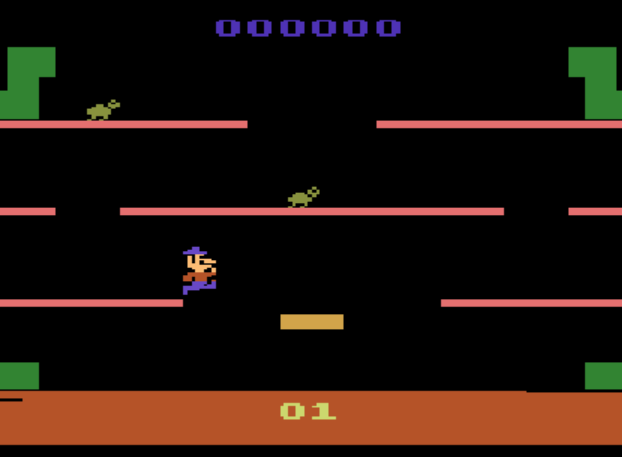
</div>

Likewise, a robot interacting with the physical world will constantly experience novel environments, with changing obstacles, and complex sequential tasks. The complexity of the task combined with the variance in the environment makes finding the optimal algorithm difficult. Reinforcement learning addresses these problems by constructing algorithms to find the best algorithm given a unique and complex situation. Refining this process, even for a fun and simpler task like designing a game agent, can advance progress for analogous real-world situations, furthering our ability to utilize computers to efficiently solve complex and novel problems.

## Overview of Past and Current Solution Ideas

### Past Solutions

#### Input Frameworks
One past solution assisted gameplay with tools to make inputs on specific frames, allowing inputs to be made at a speed faster than a human. The tools require human knowledge to make the inputs and only remove the human error after the inputs have been determined.

Alternatively, reinforcement learning has been used to help a computer to learn how to play the game, rather than assist a human. This latter option aligns more with our goals. Reinforcement learning uses a variety of techniques. A common strategy involves modeling the game as a Markov-Decision Process and trying to learn the optimal Q function, as described below.

#### Markov Decision Processes

Markov Decision Processes allow us to explore all possible options within the action space to learn which actions lead to a higher score.

MDPs are defined by the tuple $(\mathcal{S}, \mathcal{A}, T, r)$.
* $\mathcal{S}$ is set of all game state 
* $\mathcal{A}$ is the set of all actions.
* $T(s',s,a)$ is the transition function, which returns the probability of a new state $s'$ given the current state $s$ and an action $a$
* $r(s,a)$ is the reward function, which returns the reward for taking action $a$ at state $s$

With an MDP, we use a reward system instead of a label of “good” and “bad” for each action, and an algorithm called Q-learning trains the agent to maximize rewards.

#### Q-Learning

Q-learning attempts to learn the value of taking each action at each state. The action-value function $Q^{\pi}(s,a)$ returns the value of starting a trajectory by taking action $a$ at state $s$, and then using policy $\pi$ to decide subsequent actions. The function returns the expected value of the total reward obtained from the resulting trajectory. By learning the Q-function, the agent learns what actions can produce the highest rewards at each state.

To learn the Q-function, the agent begins by randomly selecting actions. When an action produces a reward, the value of that state/action combination is increased. At each state, the highest value action is most likely to be chosen. Thus, the more an action produces rewards, the more valuable it becomes, and the more likely it will be chosen. Nevertheless, the agent explores less valuable actions sometimes. This helps prevent settling on less optimal solutions. Thus, over many iterations of the game, the agent learns which actions maximize rewards and thus learns to play the game.

Q-learning is a form of unsupervised learning. No previous data showing good and bad actions is required to train the model. The model learns the best actions on its own, without initial knowledge of what actions are good or bad.

#### Double Deep Q-Learning

Double deep Q-learning (DDQL) attempts to optimize the Q-learning algorithm and prevent overestimation of action values (Hasset, 2015). Double DQN is "double" because it involves two Q-function approximations. It is "deep" because it uses a multi-layered neural network mapping from *n* states to *m* actions to learn the Q-function rather than an $n \times m$ table. The local network determines which actions to take, while the target network computes the return of the actions, and its parameters are only updated every several time steps.

DDQL has been used for the Super Mario Bros environment, which yeilded similar results to the actor-critic models A3C and TD3 (Schejbal, 2022). Thus, we will focus on the DDQL model, utilizing  Schejbal's helpful findings regarding the best training methodology and hyperparemeter values. Suggestions we used include: using a batch size of 32, learning rate of 0.00025, discount factor of 0.99, and replay buffer size of 500; focusing less on the decay schedule (has low effect on learning); syncing the target network every 1,000 steps; using two convolutional layers rather than three to boost performance without losing accuracy; using the full game state rather of a reduced $84 \times 84$ image.

We will apply the DDQL model to the Mario Bros environment, which differs from the Super Mario Bros environment. In the Super Mario Bros environment, Mario moves right along a path, earning points and avoiding death to complete the level. In the Mario Bros environment, Mario must move vertically up platforms, avoiding fireballs, and knocking turtles to earn points.  Schejbal found that agents learned better for the Super Mario Bros environment when the environment was set to always move right, not allowing the agent to stop or move left. This simplification does not work for the Mario Bros environment, making learning more difficult.

Additional Citations:
* F. Lina, *Deep Q Network: Combining Deep & Reinforcement Learning*, Aug 2021, https://towardsdatascience.com/deep-q-network-combining-deep-reinforcement-learning-a5616bcfc207

### Experience Replay

Along with a DDQN, we use experience replay, which improves learning by keeping a buffer of transitions and randomly sampling this buffer during each training step (Lin, 1992). This allows each training batch to have a more representative sample of transitions, rather than the most recent set.

One idea that we would test in the future is Prioritized Experience Replay (Schaul, 2016), which attempts to prioritize the most important transitions when sampling the buffer, rather than sampling them uniformly.

### Environment Pre-Processing

Finally, we followed standard technique by simplifying the environment before sending it to the network to reduce training time (Mnih, 2013). Pre-processing technique we used included: (1) reducing the observations from $210 \times 160$ rgb images to $84 \times 84$ grayscale images; (2) dividing color values by 255 to normalize them between 0 and 1; and (3) choosing an action and then skipping a few frames to observe the effect of the action.

However, (Schejbal, 2022) found that allowing the network to train on the original $210 \times 160$ images significantly improved performance, so we tested the model with and without reducing the image size.

## New Solution Ideas

We explored the following optimizations of the DDQL model to improve our game agent's performance.

### Death Penalty

In early testing, we tried adapting the reward function to help the agent learn. Firstly, we normalized the reward by dividing it by 800, the base reward value for the game. Secondly, we tried penalizing the agent for dying.

### Hyper-Parameter Optimization

We experimented with hyper-paramater values to improve the learning of our DQN.
* Learning rate
* Batch size
* Steps until syncing the target network to the local network
* Epsilon decay schedule and minimum value

### Model Architecture

We made the model more or less complex by:
* Adding/removing convolutional layers
* Adjusting the number, size, and stride of filters
* Using Max Pooling or not
* Adding/removing fully-connected layers
* Adjusting the number of fully-connected nuerons
* Using the GeLU vs. ReLU activation functions
* Using the Huber loss vs. the MSE

### Human player imitation

* While not implemented in our current model further trials could be run with new models based on mimicing human playthroughs (Lee, 2014)(Ortega, 2013) of Mario. Though significant changes in environment would be required as most player data is for the NES and SNES versions of Mario as opposed to Atari.


#### Additional Citations
* M. Volodymyr et al., *Asynchronous Methods for Deep Reinforcement Learning*, Proceedings of Machine Learning Research. June 2016, pp. 1928–1937, https://proceedings.mlr.press/v48/mniha16.html

* Bellemare et al., *Revisiting the Arcade Learning Environment: Evaluation Protocols and Open Problems for General Agents*, Mar 2018, https://jair.org/index.php/jair/article/view/11182

* Liao et al., *CS229 Final Report: Reinforcement Learning to Play Mario* https://cs229.stanford.edu/proj2012/LiaoYiYang-RLtoPlayMario.pdf

* S. Klein, *CS229 Final Report: Deep Q-Learning to Play Mario*, https://cs229.stanford.edu/proj2016/report/klein-autonomousmariowithdeepreinforcementlearning-report.pdf

* As Grebenisan, *Play Super Mario Bros with a Double Deep Q-Network*, 2020, https://blog.paperspace.com/building-double-deep-q-network-super-mario-bros/

* M. Comi, *How to teach AI to play Games: Deep Reinforcement Learning*, Nov 2018, https://towardsdatascience.com/how-to-teach-an-ai-to-play-games-deep-reinforcement-learning-28f9b920440a


## Hardware, Software, and Data 

#### Hardware Needs

   * Reinforcement learning proved more hardware intensive than we anticipated
   * Rented machine on Paperspace
       * Used A4000 machine with 45GiB RAM, 8 CPUs, and 16 GiB GPU for testing

#### Software Needs *(Same)*

   * Python 3.11, TensorFlow 2.14, Keras, Numpy
   * JupyterLab, JupyterNotebook
   * Gymnasium - 0.29.1
   * Ale-py - 0.8.1

#### Data Needs

   * Game states are obtained through the Gymnasium environment
   * Includes
        * Observation space
        * Action space
        * Current state
        * Reward and next state
        
   * Examples of human play for potential future implementations

## Control Flow for Software System

Give a diagram of the control and data flow for the software system
List significant software tasks, experiments, evaluation, testing, and results accomplished since the last assignment

![UML_class.png](https://cdn.discordapp.com/attachments/1164575450392166463/1179456411894304868/UML_class_2.png?ex=6579d961&is=65676461&hm=5e8af31c93d4c6efeb31a27b75f78f47c93c1b94e52c5e0ca09feb06019e7c79&)

#### Testing

   * Training for 1000 episodes
   * Game State downsampled to 84x84 and grayscaled to allow for faster training
   * ~25 episodes an hour with high end desktop (RTX 3080, Ryzen 7 5000 series)
   * ~300 episodes an hour, machine on Paperspace
   
#### Results 

   * Early training led to Mario running in a straight line to the left
   * Reward function had to be reimplemented, negative penalties increased
   * The model (Mario) learned to avoid hazards but would not gain points
   * Reduced death penalty to encourage greater exploration

## Future Work

| Team Member | Contributions |
| :- | :- |
| Gabe Simiyu | Model training, Further article research  |
| Evan Downard | Model training, Data retrieval for human play model |
| Jaden Hicks | Further optimize existing model, Model training |
| Gabe Koeller | Research into models based on human play |

## Team Report

| Team Member | Contributions |
| :- | :- |
| Gabe Simiyu | Model training, Article Research |
| Evan Downard | Model training, Notebook presentation setup, Article research |
| Jaden Hicks | Model training, Resource utilization, Primary model development |
| Gabe Koeller | Model training, Investigation/Development of alternative model |

## Appendix

### Full Reference List (with commentary on select articles)
* Hasselt et al., *Deep Reinforcement Learning with Double Q-learning*, Sep 2015, https://doi.org/10.48550/arXiv.1509.06461

* F. Lina, *Deep Q Network: Combining Deep & Reinforcement Learning*, Aug 2021, https://towardsdatascience.com/deep-q-network-combining-deep-reinforcement-learning-a5616bcfc207

* Bc. Schejbal, *Deep Reinforcement Learning for Super Mario Bros*, Feb 2022, Masters Thesis for CTU in Prague, https://dspace.cvut.cz/bitstream/handle/10467/101068/F8-DP-2022-Schejbal-Ondrej-thesis.pdf?sequence=-1&isAllowed=y

* Lin, LJ. Self-improving reactive agents based on reinforcement learning, planning and teaching. Mach Learn 8, 293–321 (1992). https://doi.org/10.1007/BF00992699

* Schaul, T. et al., *Prioritized Experience Replay*, 2016, https://doi.org/10.48550/arXiv.1511.05952

* Mnih, V., et al., *Playing Atari with Deep Reinforcement Learning*, 2013, https://doi.org/10.48550/arXiv.1312.5602

* Mnih, V. et al., *Asynchronous Methods for Deep Reinforcement Learning*, Proceedings of Machine Learning Research. June 2016, pp. 1928–1937, https://proceedings.mlr.press/v48/mniha16.html

* T. Shu et al, *Experience-Driven PCG via Reinforcement Learning: A Super Mario Bros Study*, Jul 2021,
https://arxiv.org/pdf/2106.15877.pdf

* G. Lee et al, *Learning a Super Mario controller from examples of human play*, Sep 2014,
https://ieeexplore.ieee.org/abstract/document/6900246

* J. Ortega et al, *Imitating human play styles in Super Mario Bros* Apr 2013,
https://www.um.edu.mt/library/oar/bitstream/123456789/29589/1/Imitating_human_playing_styles_in_Super_Mario_Bros.pdf




* Bellemare et al., *Revisiting the Arcade Learning Environment: Evaluation Protocols and Open Problems for General Agents*, Mar 2018, https://jair.org/index.php/jair/article/view/11182

In the above article Machado et al introduces the Arcade Learning Environment (ALE) which is an evaluation platform that both allows for the building and testing of AI agents with general competency across several Atari 2600 games. This article was particularly interesting as it explored numerous evaluation methods as well as best strategies for training AI agents specifically for Atari 2600 environments.

* Liao et al., *CS229 Final Report: Reinforcement Learning to Play Mario* https://cs229.stanford.edu/proj2012/LiaoYiYang-RLtoPlayMario.pdf

In their paper Yizheng Liao et al outlines their approach to designing an AI agent to traverse the Super Mario Bros. environment. Liao et al achieved a 90% win rate implementing Q-learning. This article was particularly interesting as they outlined exactly how their reward system was structured and how they built a markov model of the mario environment.

* S. Klein, *CS229 Final Report: Deep Q-Learning to Play Mario*, https://cs229.stanford.edu/proj2016/report/klein-autonomousmariowithdeepreinforcementlearning-report.pdf

-Demonstration of down sampling to black and white
-Train a Mario controller agent, which can learn from the game raw pixel data and in-game score

* As Grebenisan, *Play Super Mario Bros with a Double Deep Q-Network*, 2020, https://blog.paperspace.com/building-double-deep-q-network-super-mario-bros/

This article by Andrew Grebenisan, served as an introduction into how exactly we can begin approaching building an AI agent to get through the super mario bros environment. He begins by overviewing reinforcement learning, deep learning, and double deep Q-learning as well as their shortcomings such as 

* M. Comi, *How to teach AI to play Games: Deep Reinforcement Learning*, Nov 2018, https://towardsdatascience.com/how-to-teach-an-ai-to-play-games-deep-reinforcement-learning-28f9b920440a

    In this article Mauro Comi, a PhD student in machine learning at the University of Bristol, shares how to build and train a simple AI agent that is able to play Snake. In his example, he implements deep reinforcement learning through a deep Q-learning algorithm using Bayesian Optimization to optimize the artificial neural network. This was particularly interesting as they implemented deep Q-learning which allows for more ambiguous decision making from the model. 


### Other Material

* Atari Games Manual: https://atariage.com/manual_html_page.php?SoftwareLabelID=286
* Gymnasium API Documentation: https://gymnasium.farama.org/index.html


## Software

### Model